<a href="https://colab.research.google.com/github/marsaherawati/PCVK_Genap_2023/blob/main/Week7_Kelompok7_MariaF(15)_MarsaMH(16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK 7**
## **Nama Anggota:**
## 1. Maria Fadilla (2141720063 / 15)
## 2. Marsa Mawaddah Herawati (2141720257 / 16)

# **MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

## **TUJUAN**

- Mahasiswa mampu memahami konsep Filter Spasial
- Mahasiswa dapat mengetahui beberapa jenis Filter Spasial
- Mahasiswa dapat membuat filter sederhana menggunakan filter Kernel yang tersedia dan melakukan perhitungan konvolusi.

## **PRAKTIKUM FILTER**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


  c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.


### **Konvolusi Tanpa Library**

#### Membuat fungsi konvolusi

Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambahkan pada citra

d. Load citra yang akan diproses dan ubah menajadi citra keabuan

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:


f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [ ]:
img_m = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

3. Buat Image filter untuk average filter, low pass filter, high pass filter dan beberapa filter berikut

### Operasi Sharpen

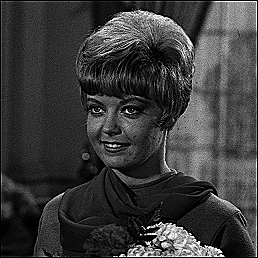

In [ ]:
# Operasi Sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

### Operasi Emboss

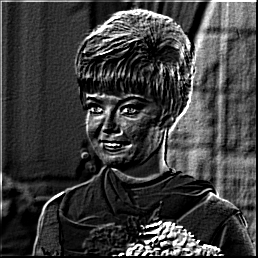

In [ ]:
#Operasi Emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss, 1,2))

### Operasi Left Sobel Edge Detection

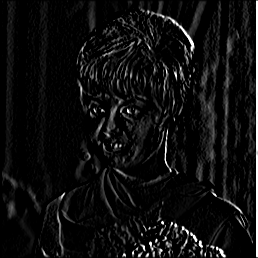

In [ ]:
#Operasi Left sobel Edge Detection
kernel_leftsobel = np.array([[1,0,-1],
                             [2,0,-2],
                             [1,0,-1]])
cv2_imshow(convolution2d(img_gray, kernel_leftsobel, 1,2))

### Operasi Canny Edge Detection

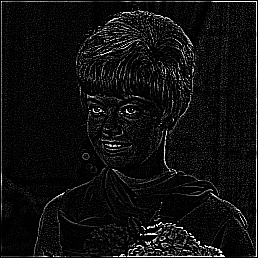

In [ ]:
#Operasi Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray, kernel_canny, 1,2))

### Operasi Prewitt Edge Detection

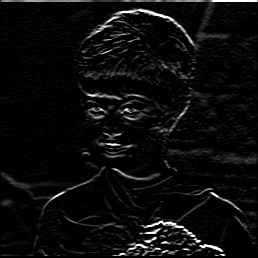

In [ ]:
#Operasi Prewitt Edge
kernel_prewitt = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1,2))

### Operasi 5x5 Gaussian Blur

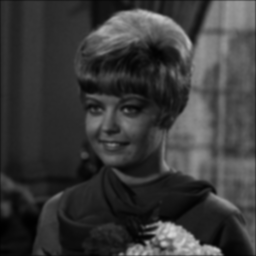

In [ ]:
# 5x5 Gaussian Blurr
kernel_blur5x5 = np.array([[1,4,6,4,1],
                              [4,16,24,16,4],
                              [6,24,36,24,6],
                              [4,16,24,16,4],
                              [1,4,6,4,1]]) / 256
cv2_imshow(convolution2d(img_gray, kernel_blur5x5, 1,2))

### Operasi 21x21 Gaussian Blur

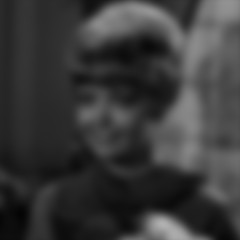

In [ ]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

## **TUGAS**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP

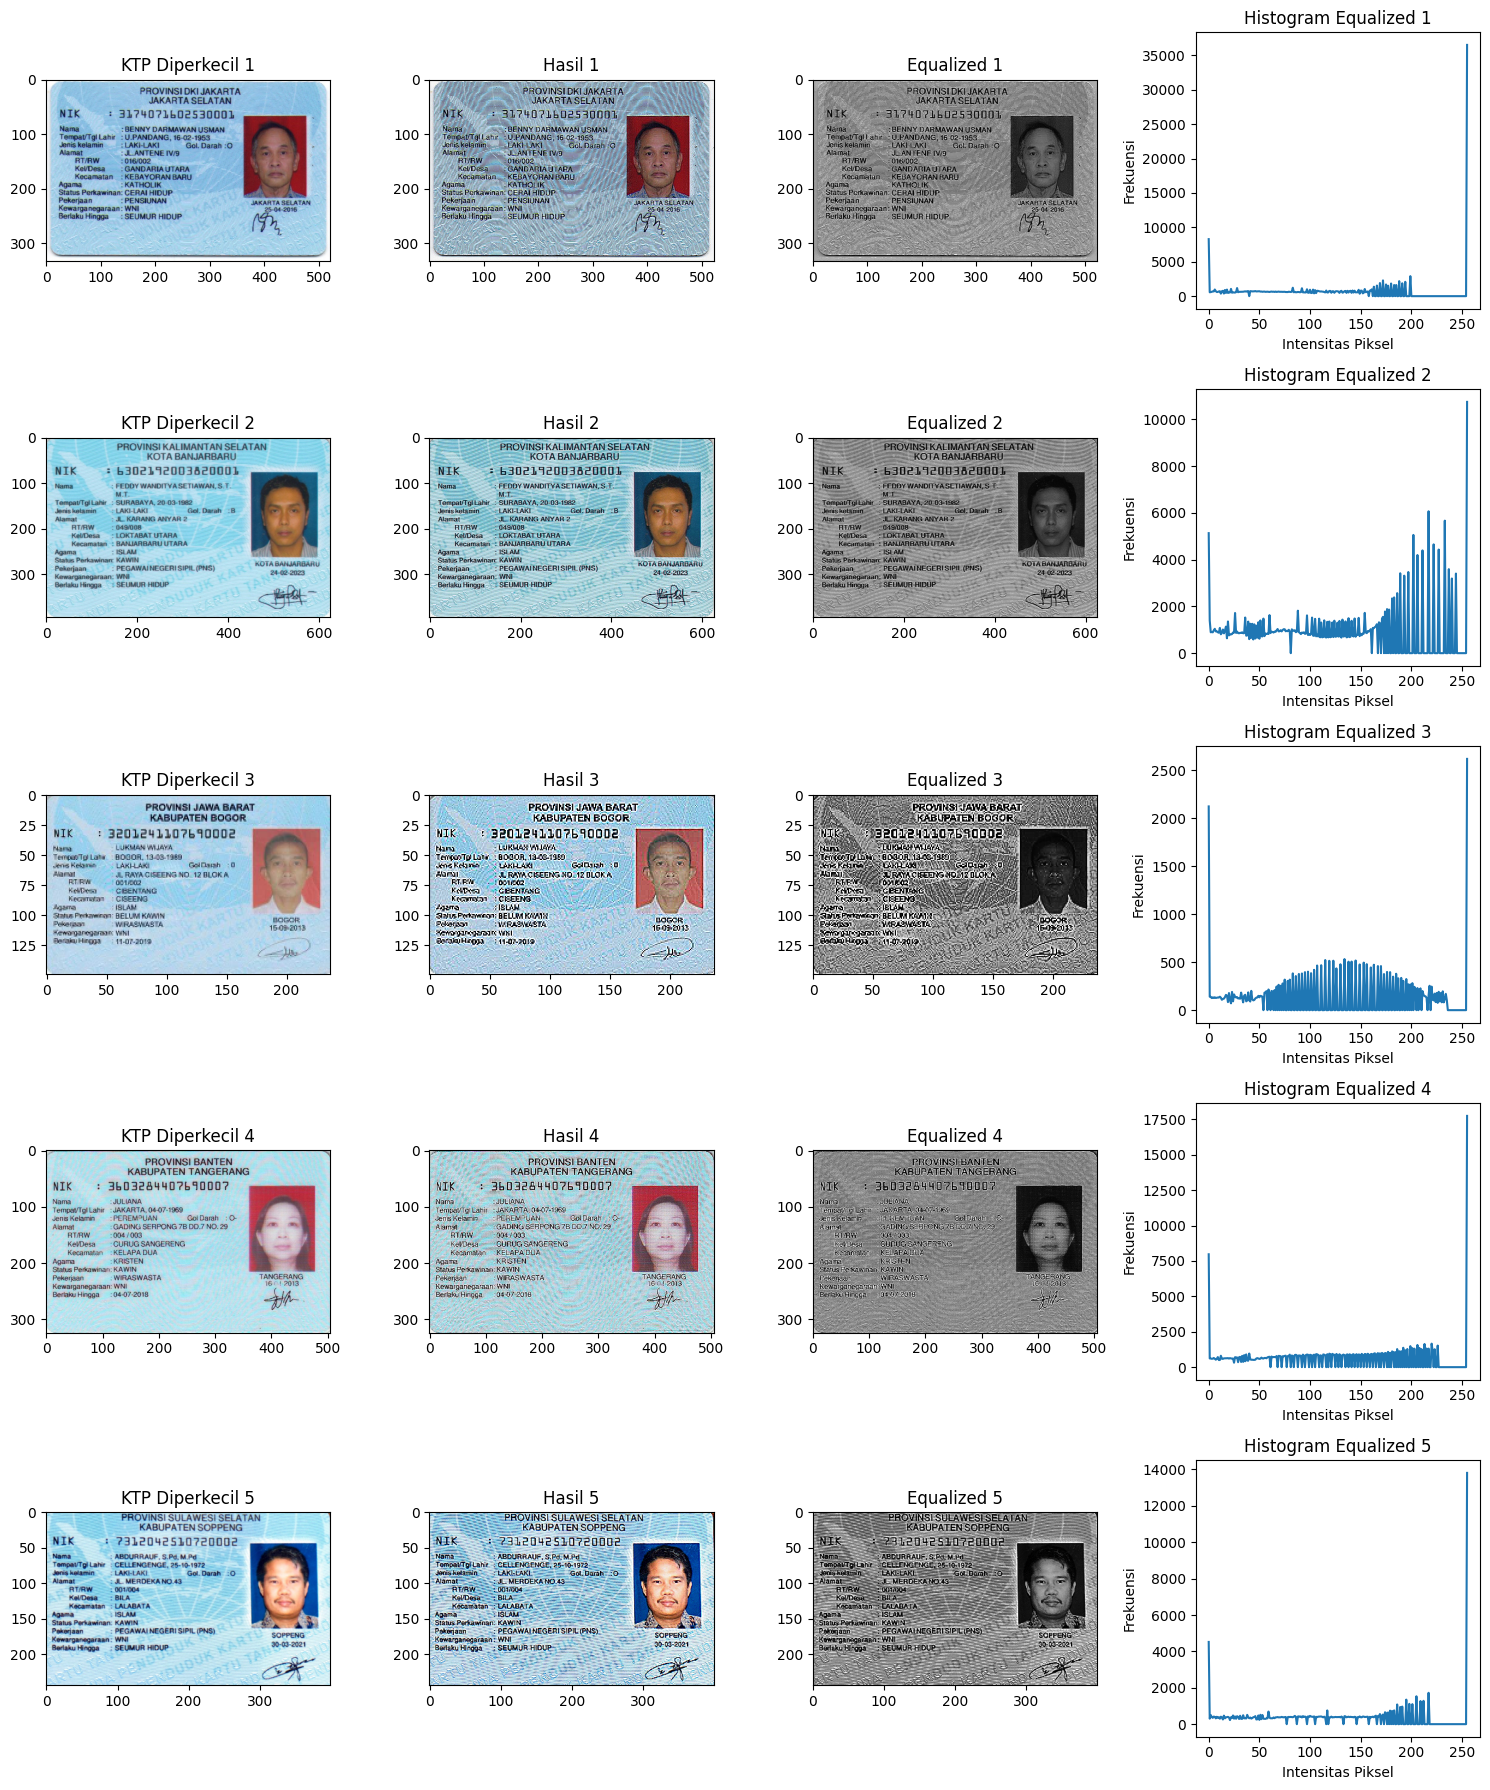

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Tentukan path folder
folder_path = '/content/drive/MyDrive/PCVK/KTP'

# Dapatkan daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Fungsi untuk penyesuaian kecerahan
def Brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])


# Buat grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)

    # Ubah ukuran gambar KTP
    ktp_image_resized = cv2.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Terapkan penyesuaian Brightness
    brightness_adjusted = Brightness(ktp_image_resized, -10)

    # Terapkan Sharpen
    result = cv2.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # Lakukan histogram equalization
    result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_equalized = cv2.equalizeHist(result_gray)
    result_equalized_color = cv2.cvtColor(result_equalized, cv2.COLOR_GRAY2BGR)

    # Tampilkan gambar asli dengan label
    axs[i, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Diperkecil {i+1}')

    # Tampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Hasil {i+1}')

    # Tampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv2.cvtColor(result_equalized_color, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized {i+1}')

    # Hitung histogram gambar hasil equalisasi
    hist_equalized = cv2.calcHist([result_equalized], [0], None, [256], [0, 256])

    # Tampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()

* Filterisasi dan Deteksi: untuk mengurangi noise dan mendeteksi fitur tertentu dalam citra. Dalam konteks KTP, ini bisa berarti mengidentifikasi dan mempertajam detail seperti foto, nama, dan nomor identitas.

* Histogram Equalization: untuk meningkatkan kontras global dalam citra. Dalam konteks KTP, ini bisa berarti membuat detail lebih mudah dibaca, terutama dalam citra yang awalnya memiliki kontras rendah.

* Operasi Aritmatika: melibatkan manipulasi matematis dari nilai piksel. Dalam konteks KTP, operasi ini bisa digunakan untuk menyesuaikan kecerahan, kontras, atau melakukan koreksi lainnya.